## Visualize Feature Importance

Goal: Create visuals for feature importance by variable and variable group

Input: Feature importance files from "predictionModels" notebook

Output: View plots

In [2]:
# imports
import os
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


## Load Data
- Pull in All data, Germany only data, and Ground transit only data

In [3]:
all_data = 'impt_all.csv'
germany = 'impt_germany.csv'
ground = 'impt_ground.csv'

path_all = os.path.join('..',all_data)
path_germany = os.path.join('..',germany)
path_ground = os.path.join('..',ground)

df_all = pd.read_csv(path_all)
df_germany = pd.read_csv(path_germany)
df_ground = pd.read_csv(path_ground)

In [4]:
df = df_all.append(df_germany).copy()
df = df.append(df_ground).copy()

In [5]:
df.head()

,feature,impt,data
0,units_per_order,0.0,all
1,facility_MANCHESTER,0.0,all
2,facility_OXFORD,0.0,all
3,on_sale_N,0.0,all
4,on_sale_Y,0.0,all


## View top 15 features by average importance level

In [6]:
top_features = df.groupby(by = 'feature').mean().sort_values(by = 'impt', ascending=False)[0:15].index

In [7]:
df_subset = df[df['feature'].isin(top_features)]

In [8]:
df_subset.sort_values(by = ['data','impt'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


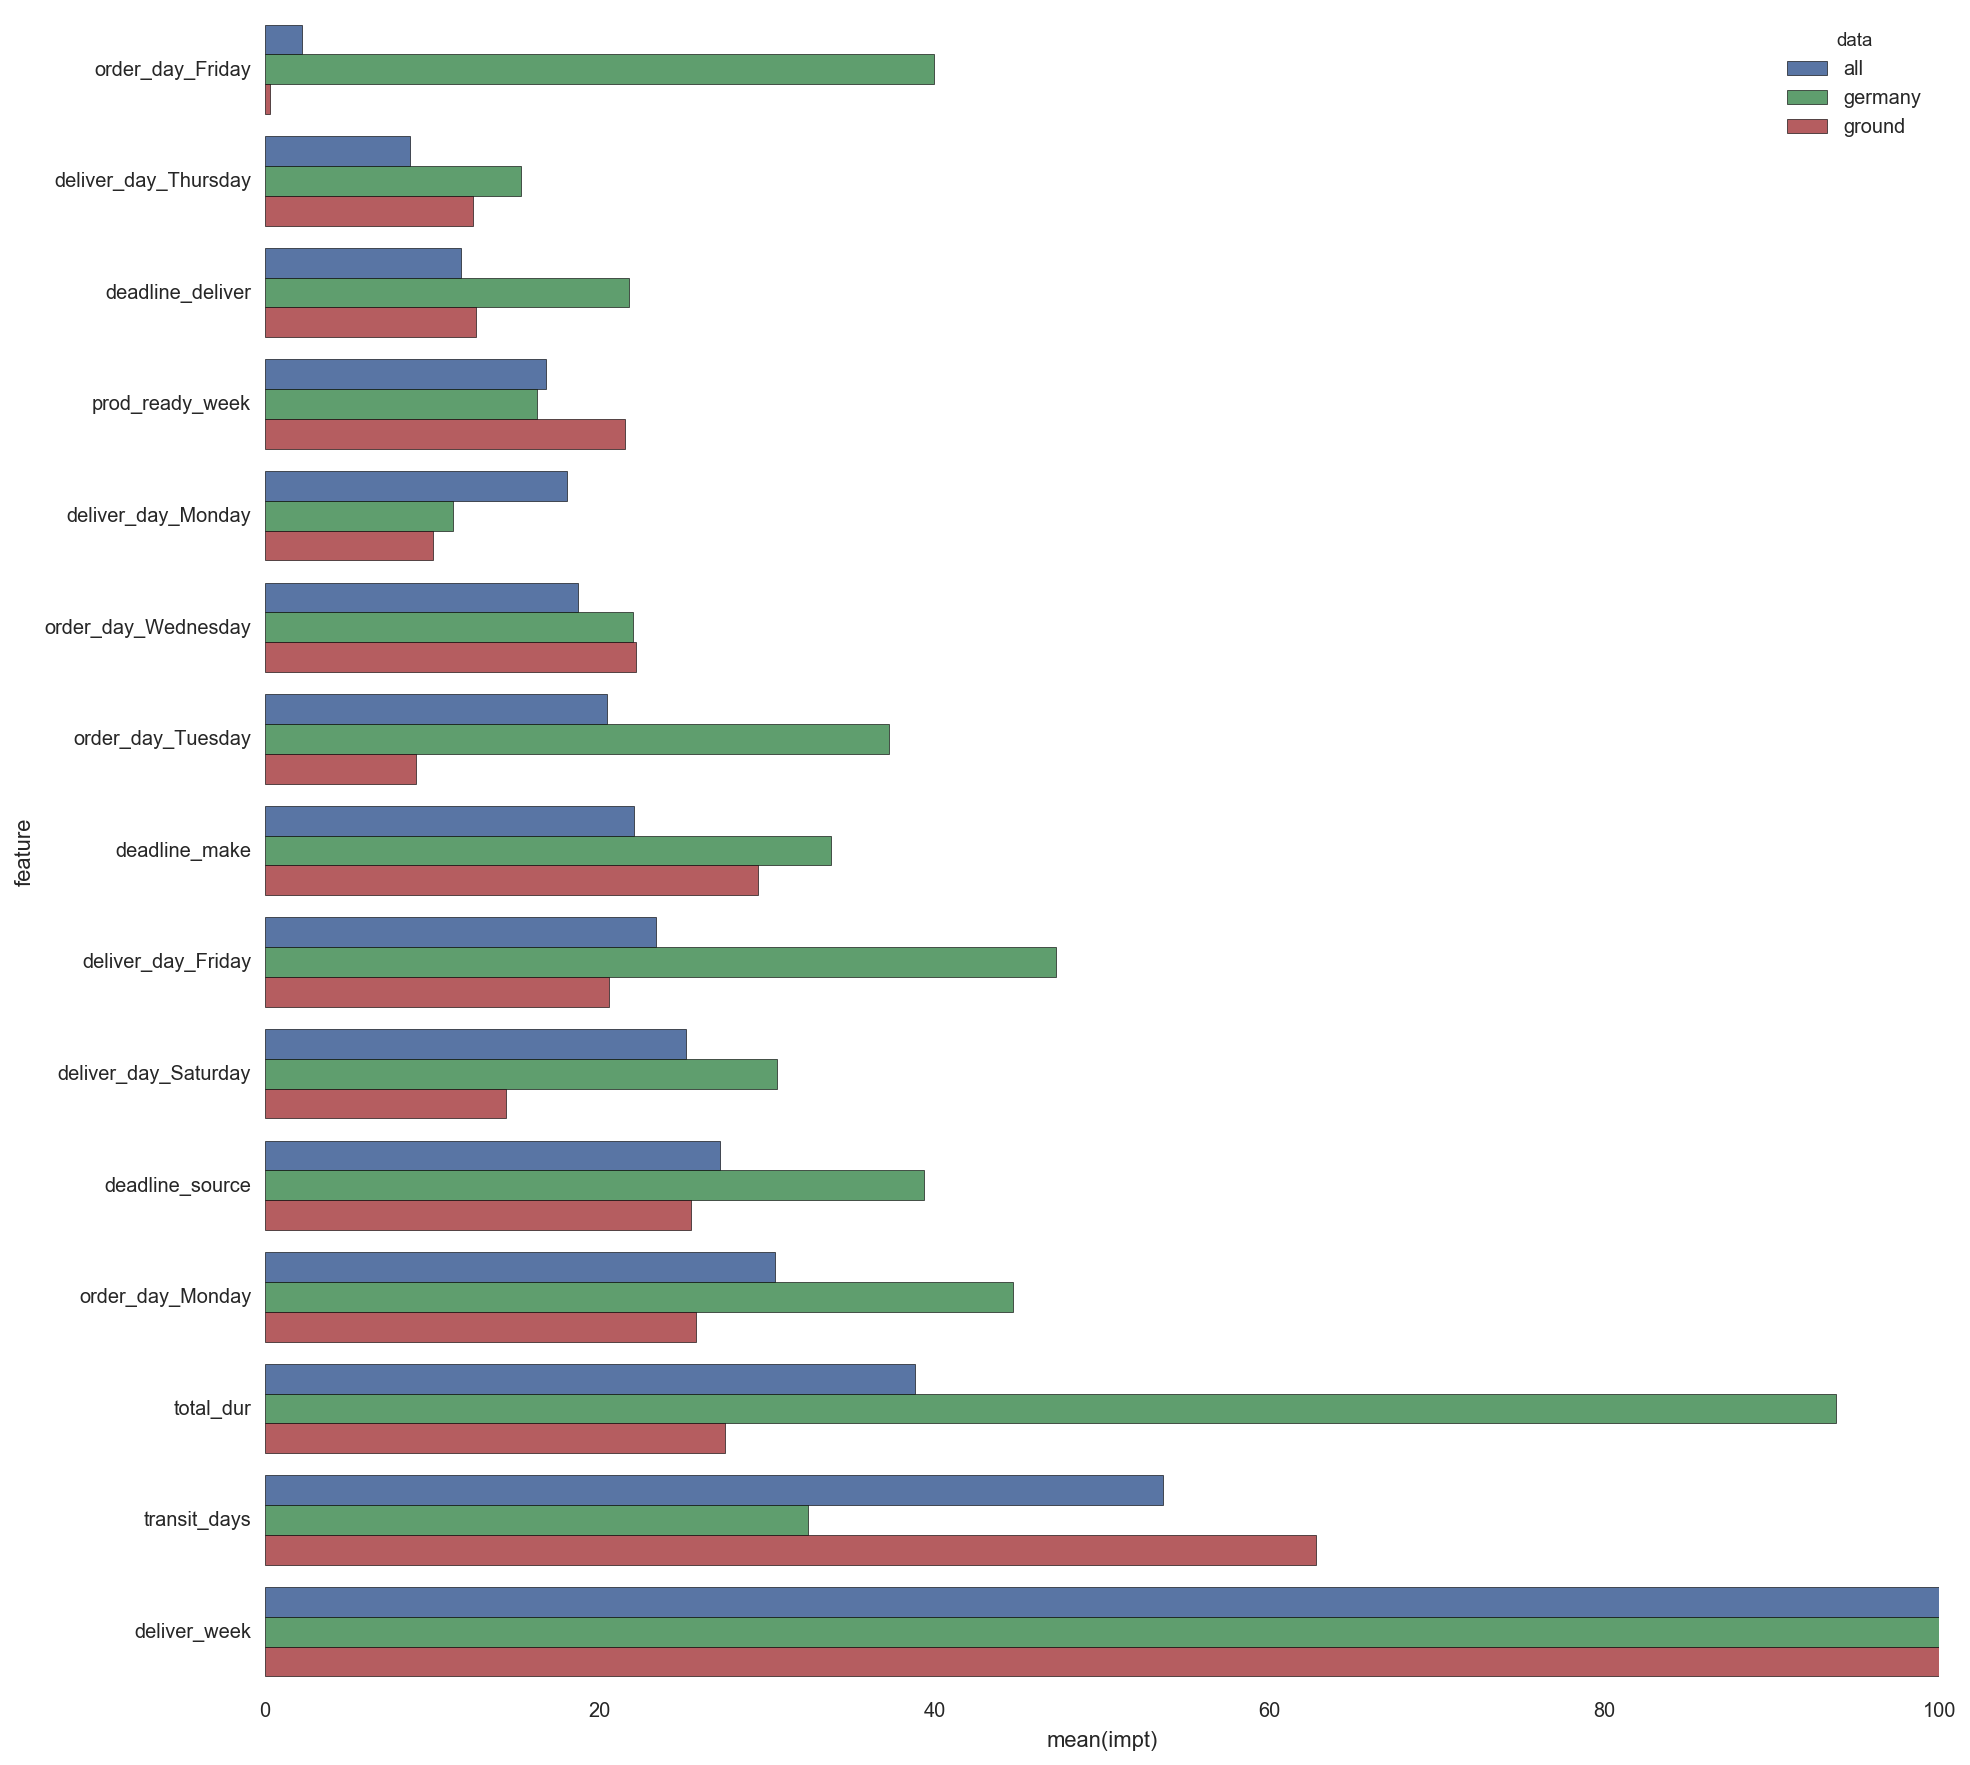

In [9]:
plt.rcParams['figure.figsize'] = 15,15
plt.rcParams['axes.facecolor']='white'
sns.barplot(data=df_subset, hue= 'data', x='impt', y='feature')

## Categorize features

In [37]:
def makeCategory(row):
    feature = row['feature']
    
    category = ""
    
    if feature.find("order_day") > -1:
        category = 'Order Day of Week'
        
    elif feature.find("deliver_day") > -1:
        category = 'Delivery Day of Week'
        
    elif feature.find("deadline") > -1:
        category = 'Slack'
        
    elif feature.find("dur") > -1:
        category = 'Phase Duration'
        
    elif feature.find("week") > -1:
        category = 'Phase Week Overlap'
        
    elif feature.find("transit") > -1:
        category = 'Transit Time'
    
    return category

In [41]:
df_subset['category'] = df_subset.apply(makeCategory, axis = 1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_subset.head()

,feature,impt,data,category
26,order_day_Friday,2.204171,all,Order Day of Week
41,deliver_day_Thursday,8.635028,all,Delivery Day of Week
47,deadline_deliver,11.704830,all,Slack
49,prod_ready_week,16.754214,all,Phase Week Overlap
51,deliver_day_Monday,18.029471,all,Delivery Day of Week


## Plot importance again now by category

In [52]:
df_cat = pd.DataFrame(df_subset.groupby(by = ['data','category'])['impt'].sum()).reset_index()

In [63]:
df_cat.sort_values(by = ['data','impt'], ascending=[True,False], inplace=True)
df_cat

,data,category,impt
3,all,Phase Week Overlap,116.754214
0,all,Delivery Day of Week,75.161104
1,all,Order Day of Week,71.761339
4,all,Slack,60.877073
5,all,Transit Time,53.658316
2,all,Phase Duration,38.814326
7,germany,Order Day of Week,143.886029
9,germany,Phase Week Overlap,116.216312
6,germany,Delivery Day of Week,104.290200
10,germany,Slack,94.919270


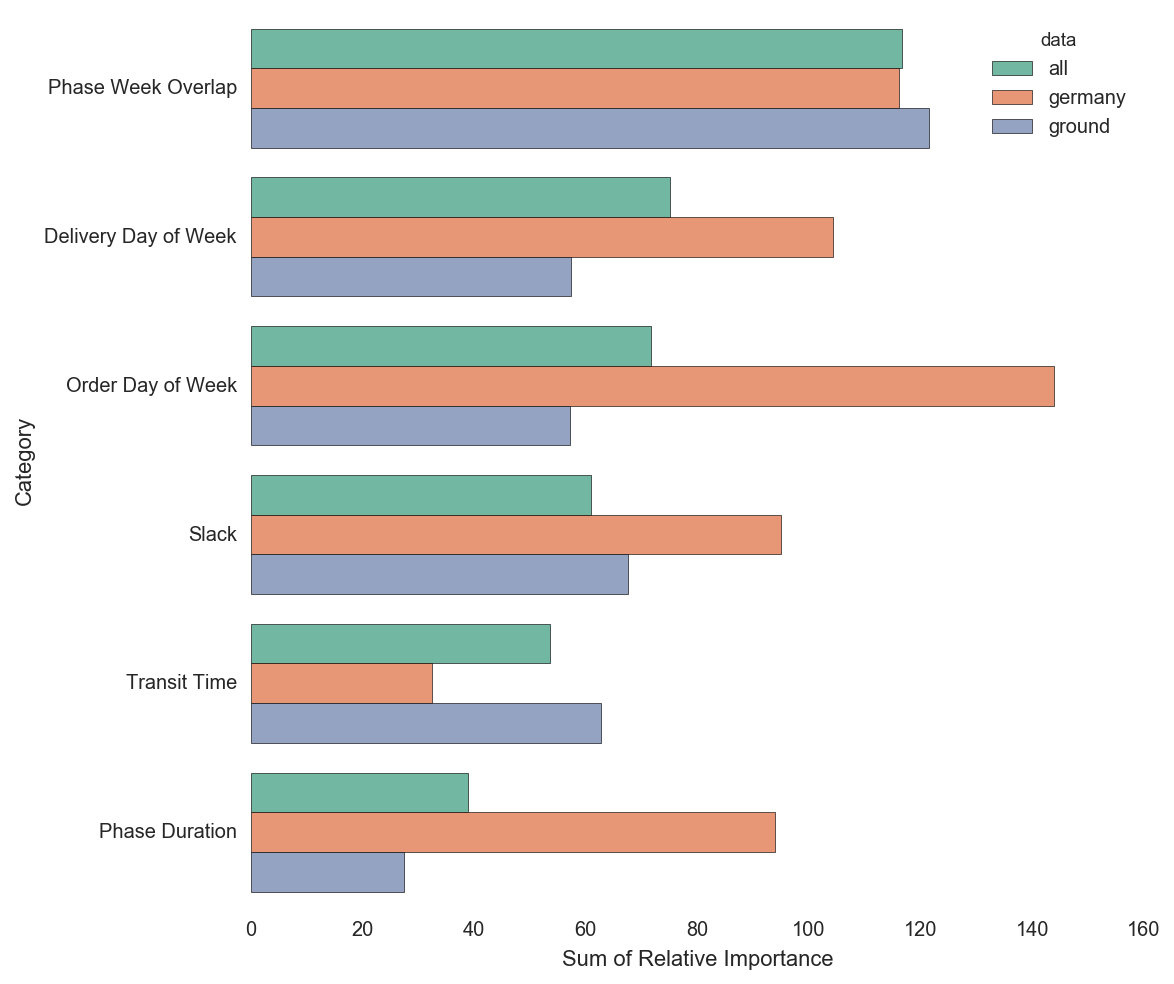

In [69]:
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['axes.facecolor']='white'

sns.barplot(data=df_cat, hue= 'data', x='impt', y='category', palette='Set2')
plt.xlabel("Sum of Relative Importance")
plt.ylabel("Category")